# **0. ОПИСАНИЕ ЗАДАЧИ СЛОВАМИ**

Данный датасет разработан для предсказания, является ли описанная работа вымышленной или реальной, с помощью алгоритмов машинного обучения

In [243]:
# Подключение библиотек
import numpy as np # Одномерные и многомерные массивы (array)
import pandas as pd # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns # графика для визуализации данных
import sklearn

# **1. СЧИТЫВАНИЕ ДАННЫХ**

In [244]:
url = "https://raw.githubusercontent.com/NikolaySamoylov/MachineLearning/main/fake_job_postings.csv"
data_raw = pd.read_csv(url)

Первые и последние значения из таблицы данных:

In [245]:
data_raw

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Количество объектов:

In [246]:
data_raw.shape[0]

17880

Количество признаков у каждого объекта:

In [247]:
data_raw.shape[1]

18

Выведем информацию о датасете:

In [248]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Разберём каждый признак:

* job_id - уникальный идентификатор работы 
* title - название работы
* location - географическое место нахождения работы 
* department - отдел работы (например, отдел продаж)
* salary_range - диапазон заработной платы  
* company_profile - краткое описание компании
* description - описание объявления о работе
* requirements - требования к кандидату на вакансию
* benefits - льготы, предлагаемые работодателем
* telecommuting - признак удалённой работы 
* has_company_logo - признак присутсивия у компании логотипа 
* has_questions - признак наличия проверочных вопросов для кандидата 
* employment_type - тип заработной платы (полный, неполный рабочий день, контракт и так далее)
* required_experience - требуемый опыт кандидата (стажёр, начальный уровень и так далее) 
* required_education - требуемая степень образования кандидата (бакалавр, магистр и так далее)
* industry - индустрия работы (IT-компания, здравоохранение, недвижемость и так далее)
* function - функции компании (консалтинг, исследования, продажи и так далее)
* fraudulent - целевой признак вымышленной работы

Имеем 13 категориальных признаков: title, location, department, salary_range, company_profile, description, requirements, benefits, employment_type, required_experience, required_education, industry, function.
<br>
1 количественный признак: job_id
<br>
4 бинарных признака: telecommuting, has_company_logo, has_questions, fraudulent

Для бинарных признаков изменим тип с int64 на тип object

In [249]:
data_raw['telecommuting'] = data_raw['telecommuting'].astype('object')
data_raw['has_company_logo'] = data_raw['has_company_logo'].astype('object')
data_raw['has_questions'] = data_raw['has_questions'].astype('object')
data_raw['fraudulent'] = data_raw['fraudulent'].astype('object')

In [250]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  object
 10  has_company_logo     17880 non-null  object
 11  has_questions        17880 non-null  object
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# **2. ВИЗУАЛИЗАЦИЯ ДАННЫХ И ВЫЧИСЛЕНИЕ ОСНОВНЫХ ХАРАКТЕРИСТИК. ИНТЕРПРЕТАЦИЯ ПОЛУЧЕННЫХ РЕЗУЛЬТАТОВ**


Так как единственный количественный признак - это уникальные числа, то выводить диаграмму рассеянности не имеет смысла, тем не менее убедимся в этом

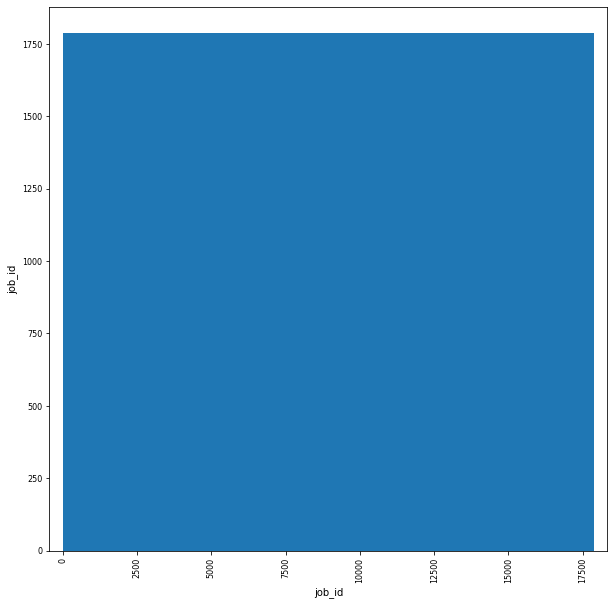

In [251]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 10), alpha = 0.05)
pass

Посмотрим, как соотносится количество вымышленной (1) и настоящей (0) работы

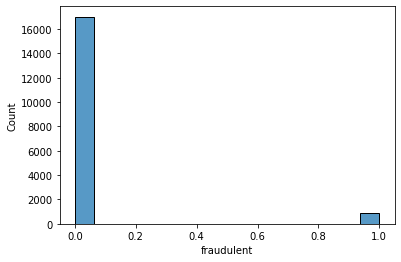

In [252]:
sns.histplot(x = 'fraudulent', data = data_raw)
pass

Из гистограммы видно, что классы несбалансированы - найдём их точное соотношение.

In [253]:
data_raw['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

Реальная работа в %:

In [254]:
data_raw['fraudulent'].value_counts()[0] / (data_raw['fraudulent'].value_counts()[0] + data_raw['fraudulent'].value_counts()[1]) * 100

95.1565995525727

Вымышленная работа в %:

In [255]:
(1 - data_raw['fraudulent'].value_counts()[0] / (data_raw['fraudulent'].value_counts()[0] + data_raw['fraudulent'].value_counts()[1])) * 100

4.8434004474272925

Вычислим основные статистические характеристики:

* mean - среднее значение
* std - стандартное отклонение
* min - минимум
* 25% - нижнее значение первого квантиля
* 50% - медиана
* 75% - верхнее значение первого квантиля
* max - максимум

In [256]:
data_raw.describe()

,job_id
count,17880.000000
mean,8940.500000
std,5161.655742
min,1.000000
25%,4470.750000
50%,8940.500000
75%,13410.250000
max,17880.000000


Выбросов не будет, так как job_id - уникальный количественный признак

Вычислим матрицу корреляции для количественных признаков:

In [257]:
corr_mat = data_raw.corr()
corr_mat

,job_id
job_id,1.0


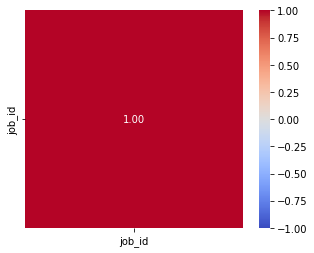

In [258]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

# **3. ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ**

Сделаем проверку на дубликаты

In [259]:
data_raw.duplicated().any()
duplicated = data_raw.duplicated()
data_raw[duplicated]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent


Можем видеть, что дубликаты отсутствуют 

Теперь обработаем пропущенные значения

In [260]:
for col in data_raw.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, data_raw[col].isna().sum()))

Кол-во пропусков в колонке job_id = 0
Кол-во пропусков в колонке title = 0
Кол-во пропусков в колонке location = 346
Кол-во пропусков в колонке department = 11547
Кол-во пропусков в колонке salary_range = 15012
Кол-во пропусков в колонке company_profile = 3308
Кол-во пропусков в колонке description = 1
Кол-во пропусков в колонке requirements = 2695
Кол-во пропусков в колонке benefits = 7210
Кол-во пропусков в колонке telecommuting = 0
Кол-во пропусков в колонке has_company_logo = 0
Кол-во пропусков в колонке has_questions = 0
Кол-во пропусков в колонке employment_type = 3471
Кол-во пропусков в колонке required_experience = 7050
Кол-во пропусков в колонке required_education = 8105
Кол-во пропусков в колонке industry = 4903
Кол-во пропусков в колонке function = 6455
Кол-во пропусков в колонке fraudulent = 0


Посчитаем, какое количество пропущенных значений в датасете:

In [261]:
sum_missing_cells = data_raw["location"].isna().sum() + data_raw["department"].isna().sum() + data_raw["salary_range"].isna().sum() + data_raw["company_profile"].isna().sum() + data_raw["description"].isna().sum() + data_raw["requirements"].isna().sum() + data_raw["benefits"].isna().sum() + data_raw["employment_type"].isna().sum() + data_raw["required_experience"].isna().sum() + data_raw["required_education"].isna().sum() + data_raw["industry"].isna().sum() + data_raw["function"].isna().sum()
sum_missing_cells

70103

Количество пропущенных значений в %:

In [262]:
percent_missing_cells = (sum_missing_cells) / (data_raw.shape[0] * data_raw.shape[1]) * 100
percent_missing_cells

21.781941337310464

Так как у признака description лишь 1 пропущенное значение, то удалим его

In [263]:
data_raw[data_raw.description.isnull()]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17513,17514,Office Manager,"PL, MZ, Warsaw",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [264]:
data_raw.drop([17513], inplace = True)

Оставшиеся категориальные пропущенные значения заменим модой:

In [265]:
data_raw['location'].fillna(data_raw['location'].mode().iloc[0], inplace=True)
data_raw['department'].fillna(data_raw['department'].mode().iloc[0], inplace=True)
data_raw['salary_range'].fillna(data_raw['salary_range'].mode().iloc[0], inplace=True)
data_raw['company_profile'].fillna(data_raw['company_profile'].mode().iloc[0], inplace=True)
data_raw['requirements'].fillna(data_raw['requirements'].mode().iloc[0], inplace=True)
data_raw['benefits'].fillna(data_raw['benefits'].mode().iloc[0], inplace=True)
data_raw['employment_type'].fillna(data_raw['employment_type'].mode().iloc[0], inplace=True)
data_raw['required_experience'].fillna(data_raw['required_experience'].mode().iloc[0], inplace=True)
data_raw['required_education'].fillna(data_raw['required_education'].mode().iloc[0], inplace=True)
data_raw['industry'].fillna(data_raw['industry'].mode().iloc[0], inplace=True)
data_raw['function'].fillna(data_raw['function'].mode().iloc[0], inplace=True)

Теперь проверим, что все пропущенные значения заполнены:

In [266]:
data_raw.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# **4. ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ**

Вычислим статистические характеристики для категориальных и бинарных признаков

* count - Количество значений для каждого признака.
* unique - Количество уникальных значений.
* top - Наиболее встречающееся значения среди всех.
* freq - Частота наиболее распространенного значения.

In [267]:
data_raw.describe(include = [object])

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17879,17879,17879,17879,17879,17879,17879,17879,17879,17879,17879,17879,17879,17879,17879,17879,17879
unique,11231,3105,1337,874,1709,14801,11968,6205,2,2,2,5,7,13,131,37,2
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
freq,311,1064,12097,15153,4033,379,3104,7935,17112,14220,9087,15090,10858,13249,6636,8203,17014


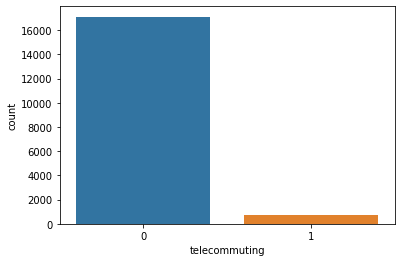

In [268]:
sns.countplot(x = 'telecommuting', data = data_raw, order=data_raw['telecommuting'].unique())
plt.show()

Удалённой работы меньше, чем очной

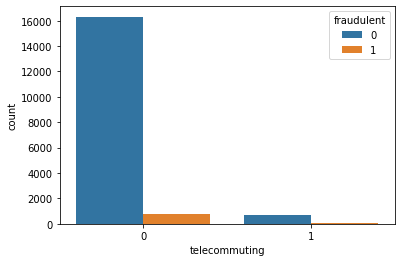

In [269]:
sns.countplot(x='telecommuting', hue='fraudulent', data=data_raw)
pass

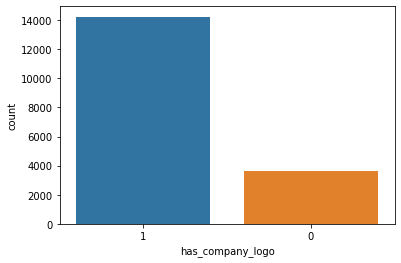

In [270]:
sns.countplot(x = 'has_company_logo', data = data_raw, order=data_raw['has_company_logo'].unique())
plt.show()

У большинства компаний присутствует логотип

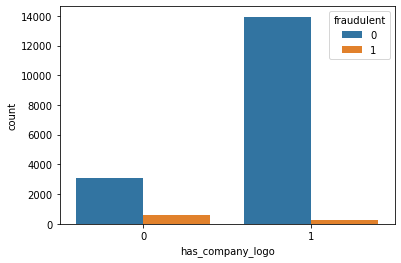

In [271]:
sns.countplot(x='has_company_logo', hue='fraudulent', data=data_raw)
pass

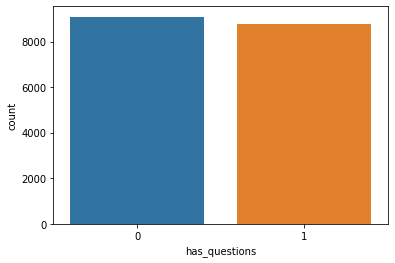

In [272]:
sns.countplot(x = 'has_questions', data = data_raw, order=data_raw['has_questions'].unique())
plt.show()

Поровну распределились компании, у которых есть проверочные вопросы для кандидатов и у которых их нет

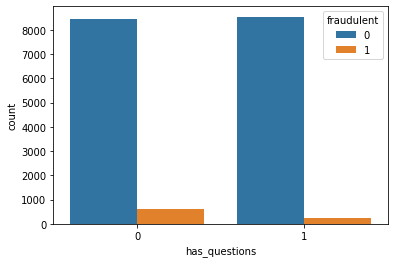

In [273]:
sns.countplot(x='has_questions', hue='fraudulent', data=data_raw)
pass

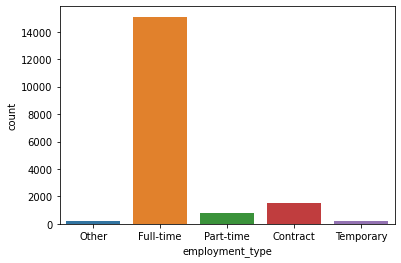

In [274]:
sns.countplot(x = 'employment_type', data = data_raw, order=data_raw['employment_type'].unique())
plt.show()

В большинстве компаний полный рабочий день

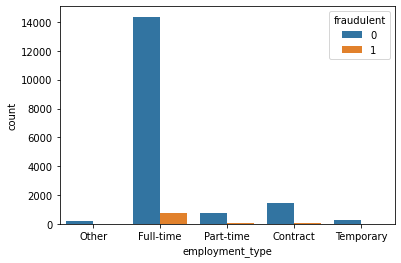

In [275]:
sns.countplot(x='employment_type', hue='fraudulent', data=data_raw)
pass

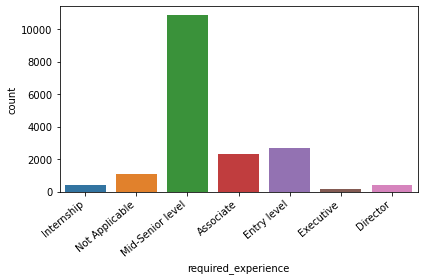

In [276]:
ax = sns.countplot(x = 'required_experience', data = data_raw, order=data_raw['required_experience'].unique())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Преобладает средне-старший уровень опыта кандидата

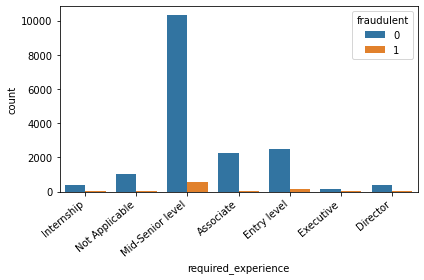

In [277]:
ax = sns.countplot(x='required_experience', hue='fraudulent', data=data_raw)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
pass

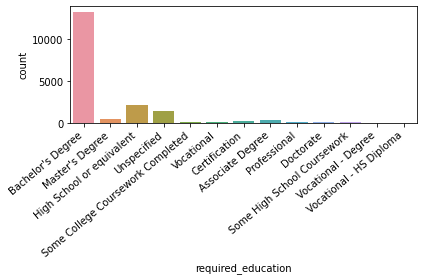

In [278]:
ax = sns.countplot(x = 'required_education', data = data_raw, order=data_raw['required_education'].unique())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Требуется преимущественно окончание бакалавриата

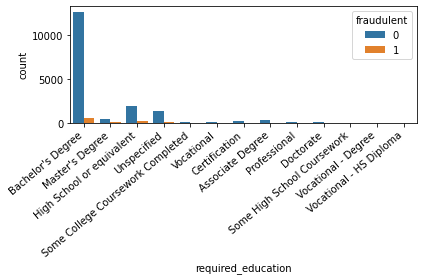

In [279]:
ax = sns.countplot(x='required_education', hue='fraudulent', data=data_raw)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
pass

Избавимся от лишних признаков

In [280]:
data = data_raw.drop(['job_id'], axis = 1, inplace = True)
data = data_raw.drop(['title'], axis = 1, inplace = True)
data = data_raw.drop(['location'], axis = 1, inplace = True)
data = data_raw.drop(['department'], axis = 1, inplace = True)
data = data_raw.drop(['salary_range'], axis = 1, inplace = True)
data = data_raw.drop(['company_profile'], axis = 1, inplace = True)
data = data_raw.drop(['description'], axis = 1, inplace = True)
data = data_raw.drop(['requirements'], axis = 1, inplace = True)
data = data_raw.drop(['benefits'], axis = 1, inplace = True)

Теперь к небинарным категориальным признакам применим метод бинаризации:

In [281]:
data_nonbinary = pd.get_dummies(data_raw[['employment_type', 'required_experience', 'required_education', 'industry', 'function']])
print(data_nonbinary.columns)

Index(['employment_type_Contract', 'employment_type_Full-time',
       'employment_type_Other', 'employment_type_Part-time',
       'employment_type_Temporary', 'required_experience_Associate',
       'required_experience_Director', 'required_experience_Entry level',
       'required_experience_Executive', 'required_experience_Internship',
       ...
       'function_Public Relations', 'function_Purchasing',
       'function_Quality Assurance', 'function_Research', 'function_Sales',
       'function_Science', 'function_Strategy/Planning',
       'function_Supply Chain', 'function_Training',
       'function_Writing/Editing'],
      dtype='object', length=193)


In [282]:
data_raw = pd.concat((data_raw, data_nonbinary), axis=1).drop(['employment_type', 'required_experience', 'required_education', 'industry', 'function'], axis=1)

In [283]:
data_raw.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Associate,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **5. ПРОВЕДЕНИЕ НОРМАЛИЗАЦИИ**

Так как в нашем случае присутствуют лишь бинарные признаки и не осталось количественных, то нормализацию проводить не нужно.

# **6. РАЗБИЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ**

In [284]:
from sklearn.model_selection import train_test_split

X = data_raw.drop('fraudulent', axis = 1)
y = data_raw['fraudulent'].astype('int64')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

12515 5364


# **7. КЛАССИФИКАТОР БЛИЖАЙШИХ СОСЕДЕЙ**

In [285]:
from sklearn.neighbors import KNeighborsClassifier

neighbours = [3, 5, 7, 10, 12, 15, 18, 20]
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# **8. ВЫЧИСЛЕНИЕ ОШИБОК НА ОБУЧАЮЩЕЙ И ТЕСТОВОЙ ВЫБОРКАХ. ВЫВОДЫ**

In [289]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict)

(0.03587694766280464, 0.03859060402684564)

In [290]:
errs_train = []
errs_test = []
for i in neighbours:    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)
    errs_train.append(np.mean(y_train != y_train_predict))
    errs_test.append(np.mean(y_test != y_test_predict))

In [291]:
mat = pd.DataFrame([errs_train, errs_test], columns = neighbours)
mat

,3,5,7,10,12,15,18,20
0,0.028126,0.029325,0.030284,0.032121,0.034359,0.033959,0.035158,0.035877
1,0.031693,0.032066,0.032252,0.034303,0.038031,0.035794,0.038031,0.038591


Ошибка на тестовой выборке во всех случаях немного больше

Построим матрицу рассогласования:

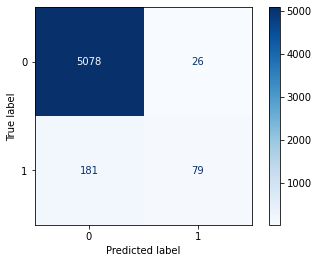

In [293]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
pass

# **9. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ**

In [294]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
Y_train_predict = lg.predict(X_train)
Y_test_predict = lg.predict(X_test)

err_train = np.mean(y_train != Y_train_predict)
err_test  = np.mean(y_test  != Y_test_predict)

print(err_train, err_test)

0.04266879744306832 0.04399701715137957


Имеем:

Ошибка на обучающей выборке: 0.04266879744306832

Ошибка на тестовой выборке: 0.04399701715137957

Построим матрицу рассогласования:

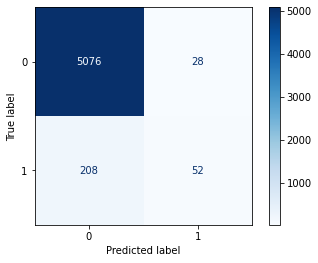

In [295]:
ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test, cmap=plt.cm.Blues)

# **10. RandomForest**

In [315]:
from sklearn import ensemble
RF = ensemble.RandomForestClassifier(n_estimators = 1000)
RF.fit(X_train, y_train)

err_train = np.mean(y_train != RF.predict(X_train))
err_test  = np.mean(y_test  != RF.predict(X_test))

print(err_train, err_test)

0.018138234119057132 0.028523489932885907


Построим матрицу рассогласования:

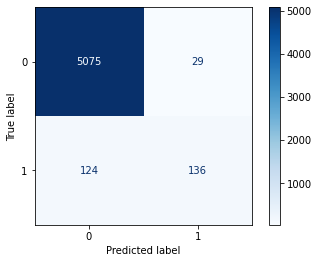

In [316]:
ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test, cmap=plt.cm.Blues)

# **11. ПОЛНОСВЯЗНАЯ НЕЙРОННАЯ СЕТЬ**

Будем использовать 1 скрытый слой. Найдем оптимальное количество нейронов в слое.

In [303]:
from sklearn.neural_network import MLPClassifier

hidden_layer = np.arange(1, 30)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), random_state = 42, max_iter = 10000)
    mlp_model.fit(X_train, y_train)

    Y_train_pred = mlp_model.predict(X_train)
    Y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != Y_train_pred))
    test_err.append(np.mean(y_test != Y_test_pred))

График зависимости ошибки от количества нейронов:

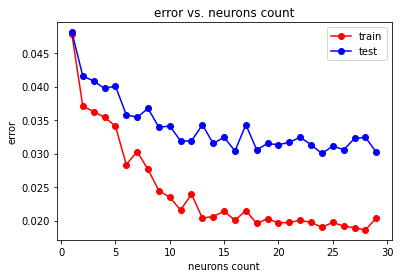

In [304]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

Найдем минимальную ошибку на обучающей и тестовой выборке:

In [305]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.018617658809428686 0.030014914243102164


Найдем количество нейронов, при котором достигается наименьшая ошибка:

In [307]:
opt_neuron = hidden_layer[test_err == min_test_err]
print(opt_neuron)

[24]


Наименьшая ошибка в тестовой выборке достигается при 24 нейронах в слое.

Построим матрицу рассогласования для данного случая.

In [308]:
mlp_model = MLPClassifier(hidden_layer_sizes = (24, ), random_state = 42, max_iter = 10000)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(24,), max_iter=10000, random_state=42)

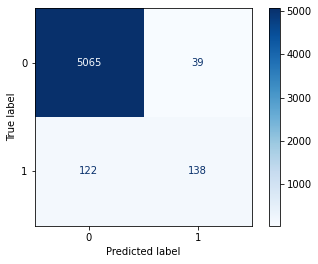

In [309]:
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap=plt.cm.Blues)

# **11. ВЫВОДЫ**

Получили следующие результаты:

Классификатор ближайших соседей (knn): 0.031693

Логистическая регрессия: 0.04399701715137957

RandomForest: 0.028523489932885907

Полносвязная нейронная сеть: 0.030014914243102164

Наименьшая ошибка на тестовой выборке наблюдается у RandomForest.


Сравним матрицы рассогласования:

Text(0.5, 1.0, 'Полносвязная нейронная сеть')

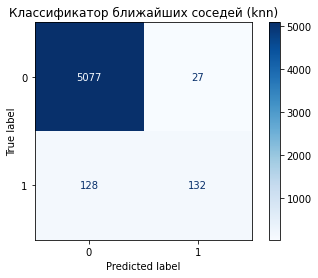

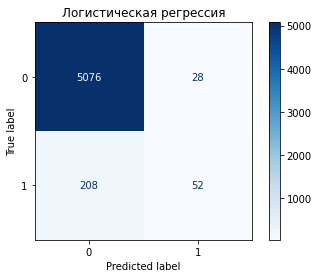

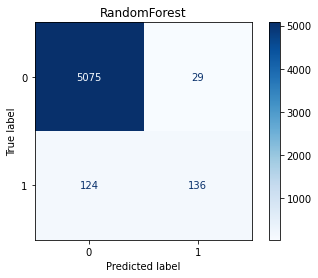

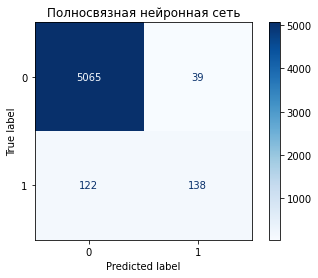

In [318]:
disp1 = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title("Классификатор ближайших соседей (knn)")

disp2 = ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test, cmap=plt.cm.Blues)
disp2.ax_.set_title("Логистическая регрессия")

disp3 = ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test, cmap=plt.cm.Blues)
disp3.ax_.set_title("RandomForest")

disp4 = ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap=plt.cm.Blues)
disp4.ax_.set_title("Полносвязная нейронная сеть")

Видим, что в нахождении истинных пропусков True Negative (TN) хуже всех себя показала полносвязная нейронная сеть, зато она превосходит другие алгоритмы в определении истинных срабатываний True Positive (TP).
Больше всего ложных пропусков False Negative (FN) сделала логистическая регрессия, а ложных срабатываний False Positive (FP) - полносвязная нейронная сеть.